## 蘋果新聞抓取

In [2]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime') 
#res.text

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [8]:
newsary = [] 
for link in soup.select('.rtddt a'):
    title = link.select('h1')[0].text
    category = link.select('h2')[0].text
    dt = link.select('time')[0].text
    url = link['href']
    newsary.append({'title':title, 'category':category, 'dt':dt, 'url':url})

In [10]:
import pandas
df  = pandas.DataFrame(newsary)
df.head()

,category,dt,title,url
0,國際,09:26,德國前總統丟工作後 被踢爆赴中國撈金(6),https://tw.news.appledaily.com/international/r...
1,地產,09:26,大膽就中！ 創造自己的巴洛克風,https://tw.finance.appledaily.com/realtime/201...
2,體育,09:24,【西甲】半場輸2球驚險扳回 貝提斯主和赫...(2),https://tw.sports.appledaily.com/realtime/2017...
3,生活,09:21,誠徵油漆工刷鐵門 她的開價讓網友怒了(262),https://tw.news.appledaily.com/life/realtime/2...
4,體育,09:13,7人得分雙位數 公牛爆冷客場大勝魔術(150),https://tw.sports.appledaily.com/realtime/2017...


## 語音小秘書

In [76]:
! pip install PyAudio

In [77]:
! pip install SpeechRecognition

In [90]:
import speech_recognition
r = speech_recognition.Recognizer()

with speech_recognition.Microphone() as source:
    r.adjust_for_ambient_noise(source)
    audio = r.listen(source)

r.recognize_google(audio, language='zh-TW')

TypeError: recognize_bing() missing 1 required positional argument: 'key'

In [ ]:
! pip install gTTS

In [13]:
! pip install pygame

In [11]:
from gtts import gTTS
tts = gTTS(text='大大安安幾歲您好', lang='zh')
tts.save("hello4.mp3")

In [ ]:
from pygame import mixer
mixer.init()
import tempfile
def speak(sentence):
    with tempfile.NamedTemporaryFile(delete=True) as fp:
        tts = gTTS(text=sentence, lang='zh')
        tts.save("{}.mp3".format(fp.name))
        mixer.music.load('{}.mp3'.format(fp.name))
        mixer.music.play()
speak('今天很開心看到大家')

In [18]:
?requests.get

In [91]:
import requests
from bs4 import BeautifulSoup
def searchWiki(term):
    term = term.replace('Google','')
    res = requests.get('https://zh.wikipedia.org/wiki/{}'.format(term), allow_redirects=True)
    soup = BeautifulSoup(res.text, 'html.parser')
    article = soup.select('#mw-content-text > div > p')[0].text
    return article.split('。')[0]

In [92]:
import speech_recognition

def getSpeech():
    r = speech_recognition.Recognizer()

    with speech_recognition.Microphone() as source:
        r.adjust_for_ambient_noise(source)
        audio = r.listen(source)

    return r.recognize_google(audio, language='zh-TW')
getSpeech()

'怎麼弄'

In [93]:
speak(searchWiki(getSpeech()))

## Numpy

In [32]:
a = [1,3,5,7,9]
a.pop()
print(a)
a.append(9)
print(a)

[1, 3, 5, 7]
[1, 3, 5, 7, 9]


In [33]:
a = [1,3,5,7,9]
b = [2,4,6,8,10]

In [38]:
ary = []
for i in range(0, len(a)):
    ary.append(a[i] * b[i])
ary

[2, 12, 30, 56, 90]

In [39]:
[a[i] * b[i] for i in range(0, len(a))]

[2, 12, 30, 56, 90]

In [41]:
for ele in zip(a,b):
    print(ele)

(1, 2)
(3, 4)
(5, 6)
(7, 8)
(9, 10)


In [42]:
for i,j in zip(a,b):
    print(i * j)

2
12
30
56
90


In [43]:
[i*j for i,j in zip(a,b)]

[2, 12, 30, 56, 90]

In [49]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.104.com.tw/job/?jobno=5mw95&jobsource=n104bank1')
soup = BeautifulSoup(res.text, 'html.parser') 
dd = [ele.text.strip() for ele in soup.select('dd')]
dt = [ele.text.strip() for ele in soup.select('dt')]
#for ele in zip(dt, dd):
#    print(ele)
dict(zip(dt, dd))

{'上班地點：': '台北市信義區松仁路123號8樓\n\n\n\n\n\n\n\n地圖找工作',
 '上班時段：': '日班',
 '休假制度：': '依公司規定',
 '其他條件：': 'Qualifications\r1. 5-8 years experience in software product marketing across multiple markets in Asia-Pacific \r2. Excellent verbal and written communication skills \r3. Strong track record of cross-functional collaboration\r4. Ability to work independently and proactively, strong project management skills.\r5. You should feel comfortable with ambiguity and enjoy working at a fast-paced startup where the business is continually evolving',
 '其他：': 'Please submit your CV via Appier career website,\rhttps://www.appier.com/en/careers.html\rWe look forward to hearing from you!',
 '出差外派：': '無需出差外派',
 '可上班日：': '不限',
 '學歷要求：': '大學以上',
 '工作待遇：': '面議',
 '工作性質：': '全職',
 '工作技能：': '不拘',
 '工作經歷：': '5年以上',
 '廠商求才專線': '忘記密碼',
 '接受身份：': '上班族、外籍人士、原住民【相關法令】',
 '擅長工具：': '不拘',
 '求職服務專線': '02-2912-6104\xa0轉2',
 '科系要求：': '不拘',
 '管理責任：': '不需負擔管理責任',
 '聯絡人：': '陳小姐',
 '職務類別：': '行銷企劃主管、產品企劃主管 \n\n\n\n\n\n\n認識「」職務\n\n

In [53]:
import numpy 
a = [1,3,5,7,9]
b = [2,4,6,8,10]
na = numpy.array(a)
nb = numpy.array(b)
na * nb
na + nb

array([ 3,  7, 11, 15, 19])

In [55]:
import numpy as np
na = np.array([1,2,3,4,5])
na
type(na)

numpy.ndarray

In [57]:
na[0]

1

In [58]:
na[1:3]

array([2, 3])

In [60]:
na > 3

array([False, False, False,  True,  True], dtype=bool)

In [61]:
na[na > 3]

array([4, 5])

In [62]:
na=np.array([[1,2,3,4,5],[6,7,8,9,10]])

In [63]:
na

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [65]:
na[:,0]

array([1, 6])

In [66]:
na[0,:]

array([1, 2, 3, 4, 5])

In [67]:
na.T

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [68]:
na=np.array([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]])
na

array([['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']],
      dtype='<U5')

In [69]:
import pandas
df = pandas.DataFrame([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]])

In [71]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [72]:
df.columns = ['name', 'gender', 'age']

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
name      6 non-null object
gender    6 non-null object
age       6 non-null int64
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [75]:
df.loc[1:3,['name', 'gender']]

,name,gender
1,mary,F
2,tom,M
3,ted,M


## Pandas Series

In [94]:
import pandas as pd
s = pd.Series([21000,18900, 18000])
s

0    21000
1    18900
2    18000
dtype: int64

In [95]:
type(s)

pandas.core.series.Series

In [96]:
pd.Series([21000,18900,18000], index=['Iphone','Edge S7','HTC M1'])

Iphone     21000
Edge S7    18900
HTC M1     18000
dtype: int64

In [97]:
s= pd.Series({'Iphone':21000,'Edge S7':18900,'HTC M1':18000})

In [98]:
s

Edge S7    18900
HTC M1     18000
Iphone     21000
dtype: int64

In [108]:
s.index

Index(['Edge S7', 'HTC M1', 'Iphone'], dtype='object')

In [109]:
s[0]

18900

In [110]:
s.index[0]

'Edge S7'

In [111]:
s[2]

21000

In [112]:
s[1:3]

HTC M1    18000
Iphone    21000
dtype: int64

In [113]:
s['Iphone']

21000

In [114]:
s[['Iphone','Edge S7']]

Iphone     21000
Edge S7    18900
dtype: int64

In [119]:
s[np.array([True, False, True]) ]

Edge S7    18900
Iphone     21000
dtype: int64

In [120]:
s < 20000

Edge S7     True
HTC M1      True
Iphone     False
dtype: bool

In [116]:
s[s < 20000]

Edge S7    18900
HTC M1     18000
dtype: int64

In [121]:
cheap=s<20000

In [123]:
cheap

Edge S7     True
HTC M1      True
Iphone     False
dtype: bool

In [124]:
s[cheap]

Edge S7    18900
HTC M1     18000
dtype: int64

In [125]:
s['Iphone']

21000

In [126]:
s['Iphone'] = 20000

In [127]:
s

Edge S7    18900
HTC M1     18000
Iphone     20000
dtype: int64

In [130]:
s[s<20000] = s[s<20000] * 0.8

In [131]:
s

Edge S7    15120
HTC M1     14400
Iphone     20000
dtype: int64

In [132]:
'Iphone' in s

True

In [133]:
'mi' in s

False

In [135]:
s * 0.8

Edge S7    12096.0
HTC M1     11520.0
Iphone     16000.0
dtype: float64

In [136]:
import numpy as np
np.sqrt(s)

Edge S7    122.963409
HTC M1     120.000000
Iphone     141.421356
dtype: float64

In [138]:
s.max()

20000

In [139]:
s.min()

14400

In [140]:
s.mean()

16506.666666666668

In [141]:
s.describe()

count        3.000000
mean     16506.666667
std       3046.659373
min      14400.000000
25%      14760.000000
50%      15120.000000
75%      17560.000000
max      20000.000000
dtype: float64

In [149]:
s[['HTC M1', 'Iphone']]
s[['mi', 'HTC M1']]

s2 = s[['HTC M1', 'Iphone']]+s[['mi', 'HTC M1']]

In [150]:
s2

HTC M1    28800.0
Iphone        NaN
mi            NaN
dtype: float64

In [151]:
s2.isnull()

HTC M1    False
Iphone     True
mi         True
dtype: bool

In [152]:
s2.notnull()

HTC M1     True
Iphone    False
mi        False
dtype: bool

In [145]:
# python
None

#numpy
np.nan

nan

## Pandas DataFrame

In [153]:
df=pd.DataFrame([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]])
df.columns=['name','gender','age']
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [154]:
df=pd.DataFrame([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]],columns=['name','gender','age'])
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [156]:
df=pd.DataFrame([{'name':'frank','gender':'M','age':29},
                 {'name':'mary','gender':'F','age':23},
                 {'name':'tom','gender':'M','age':35},
                 {'name':'ted','gender':'M','age':33},
                 {'name':'jean','gender':'F','age':21},
                 {'name':'lisa','gender':'F','age':20}])
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [157]:
df=pd.DataFrame([{'name':'frank','gender':'M','age':29},
                 {'name':'mary','gender':'F','age':23},
                 {'name':'tom','gender':'M','age':35, 'occupation':'RD'},
                 {'name':'ted','gender':'M','age':33},
                 {'name':'jean','gender':'F','age':21},
                 {'name':'lisa','gender':'F','age':20}])
df

,age,gender,name,occupation
0,29,M,frank,NaN
1,23,F,mary,NaN
2,35,M,tom,RD
3,33,M,ted,NaN
4,21,F,jean,NaN
5,20,F,lisa,NaN


In [158]:
df.head()

,age,gender,name,occupation
0,29,M,frank,NaN
1,23,F,mary,NaN
2,35,M,tom,RD
3,33,M,ted,NaN
4,21,F,jean,NaN


In [159]:
df.head(3)

,age,gender,name,occupation
0,29,M,frank,NaN
1,23,F,mary,NaN
2,35,M,tom,RD


In [160]:
df.tail()

,age,gender,name,occupation
1,23,F,mary,NaN
2,35,M,tom,RD
3,33,M,ted,NaN
4,21,F,jean,NaN
5,20,F,lisa,NaN


In [162]:
df.tail(3)

,age,gender,name,occupation
3,33,M,ted,NaN
4,21,F,jean,NaN
5,20,F,lisa,NaN


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
age           6 non-null int64
gender        6 non-null object
name          6 non-null object
occupation    1 non-null object
dtypes: int64(1), object(3)
memory usage: 272.0+ bytes


In [164]:
df.describe()

,age
count,6.000000
mean,26.833333
std,6.400521
min,20.000000
25%,21.500000
50%,26.000000
75%,32.000000
max,35.000000


In [165]:
df.dtypes

age            int64
gender        object
name          object
occupation    object
dtype: object

In [167]:
df.ix[1]

age             23
gender           F
name          mary
occupation     NaN
Name: 1, dtype: object

In [168]:
df.ix[1:4]

,age,gender,name,occupation
1,23,F,mary,NaN
2,35,M,tom,RD
3,33,M,ted,NaN
4,21,F,jean,NaN


In [169]:
df['name']

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [170]:
df[['name', 'age']]

,name,age
0,frank,29
1,mary,23
2,tom,35
3,ted,33
4,jean,21
5,lisa,20


In [171]:
df.ix[  1:2    ,    ['name' , 'age']    ]

,name,age
1,mary,23
2,tom,35


In [172]:
type(df)

pandas.core.frame.DataFrame

In [173]:
type(df['name'])

pandas.core.series.Series

In [175]:
df['gender'] == 'M'

0     True
1    False
2     True
3     True
4    False
5    False
Name: gender, dtype: bool

In [176]:
df[df['gender'] == 'M']

,age,gender,name,occupation
0,29,M,frank,NaN
2,35,M,tom,RD
3,33,M,ted,NaN


In [179]:
(df['gender'] == 'M') & (df['age'] > 30)
df[(df['gender'] == 'M') & (df['age'] > 30)]

,age,gender,name,occupation
2,35,M,tom,RD
3,33,M,ted,NaN


In [180]:
df[(df['gender'] == 'M') | (df['age'] > 30)]

,age,gender,name,occupation
0,29,M,frank,NaN
2,35,M,tom,RD
3,33,M,ted,NaN


In [181]:
df['employee'] = True

In [182]:
df

,age,gender,name,occupation,employee
0,29,M,frank,NaN,True
1,23,F,mary,NaN,True
2,35,M,tom,RD,True
3,33,M,ted,NaN,True
4,21,F,jean,NaN,True
5,20,F,lisa,NaN,True


In [183]:
del df['employee']

In [184]:
df

,age,gender,name,occupation
0,29,M,frank,NaN
1,23,F,mary,NaN
2,35,M,tom,RD
3,33,M,ted,NaN
4,21,F,jean,NaN
5,20,F,lisa,NaN


In [194]:
df.drop('occupation',1, inplace=True)
df.drop(5, 0, inplace=True)

In [195]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean


In [196]:
df.loc[5]={'age':20,'gender':'F','name':'qoo'}

In [197]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,qoo


In [198]:
df.append(pd.DataFrame([{'age':20,'gender':'F','name':'qoo'}]),ignore_index=True)

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,qoo
6,20,F,qoo


In [200]:
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,qoo


In [201]:
df.drop(5)

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean


In [206]:
#df
df['userid']=range(101,107)


In [208]:
df.set_index('userid',inplace=True)

In [209]:
df

,age,gender,name
userid,,,
101,29,M,frank
102,23,F,mary
103,35,M,tom
104,33,M,ted
105,21,F,jean
106,20,F,qoo


In [211]:
df.iloc[1]

age         23
gender       F
name      mary
Name: 102, dtype: object

In [212]:
df.iloc[[1,3,5]]

,age,gender,name
userid,,,
102,23,F,mary
104,33,M,ted
106,20,F,qoo


In [213]:
df.ix[[101,103,105]]

,age,gender,name
userid,,,
101,29,M,frank
103,35,M,tom
105,21,F,jean


In [214]:
df.loc[[101,103,105]]

,age,gender,name
userid,,,
101,29,M,frank
103,35,M,tom
105,21,F,jean


## 抓取台股子公司

In [230]:
import requests
payload = {
'encodeURIComponent':'1',
'step':'1',
'firstin':'1',
'off':'1',
'keyword4':'',
'code1':'',
'TYPEK2':'',
'checkbtn':'',
'queryName':'co_id',
'inpuType':'co_id',
'TYPEK':'all',
'co_id':''    
    
}

stock_ary = []
for stock in ['2330', '2317','2454']:
    payload['co_id'] = stock
    res = requests.post('http://mops.twse.com.tw/mops/web/ajax_t79sb02', data = payload)
    res.encoding = 'utf-8'
    dfs = pandas.read_html(res.text)
    df = dfs[1]
    df.columns = df.ix[0]
    df.drop(0, inplace=True)
    stock_ary.append(df)
stockdf = pandas.concat(stock_ary)
stockdf.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,事實發生日,重要子公司名稱,主要經營業務,地區,符合重要子公司認定之標準(註)
1,93/04/16,台灣積體電路(北美)公司,積體電路及其他半導體裝置之銷售業務,U.S.A/美國,1
2,106/02/16,TSMC Global Ltd.,一般投資業務,British Virgin IS./英屬維京群島,1
1,99/04/26,FOXCONN (FAR EAST) LTD.,從事控股及轉投資事務,CAYMAN IS./開曼群島,1
2,102/03/28,BEST BEHAVIOUR HOLDINGS LTD.,"未限定,但以不違反當地法令為前提",British Virgin IS./英屬維京群島,1
3,102/03/28,CHINA GALAXY ENTERPRISES LTD.,"未限定,但以不違反當地法令為前提",HONG KONG/香港,1


## 處理缺失值

In [232]:
import pandas as pd
import numpy as np
df=pd.DataFrame([\
                 ['frank','M',np.nan],\
                 ['mary',np.nan,np.nan],\
                 ['tom','M',35],\
                 ['ted','M',33],\
                 ['jean',np.nan,21],\
                 ['lisa','F',20]])
df.columns=['name','gender','age']
df

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [234]:
df['gender'].isnull()

0    False
1     True
2    False
3    False
4     True
5    False
Name: gender, dtype: bool

In [235]:
df['gender'].notnull()

0     True
1    False
2     True
3     True
4    False
5     True
Name: gender, dtype: bool

In [236]:
df.name

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [237]:
df['name']

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [240]:
df.name.isnull().values.any()

False

In [241]:
df.gender.isnull().values.any()

True

In [242]:
df.isnull().values.any()

True

In [243]:
df.isnull().sum()

name      0
gender    2
age       2
dtype: int64

In [244]:
df.isnull().sum().sum()

4

In [245]:
df.dropna()

,name,gender,age
2,tom,M,35.0
3,ted,M,33.0
5,lisa,F,20.0


In [246]:
df.dropna(how='all')

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [247]:
df.dropna(thresh=2)

,name,gender,age
0,frank,M,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [248]:
df['employee']=np.nan

In [250]:
df.dropna(axis=1,how='all')

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [251]:
df.fillna(0)

,name,gender,age,employee
0,frank,M,0.0,0.0
1,mary,0,0.0,0.0
2,tom,M,35.0,0.0
3,ted,M,33.0,0.0
4,jean,0,21.0,0.0
5,lisa,F,20.0,0.0


In [252]:
df['age'].fillna(0)

0     0.0
1     0.0
2    35.0
3    33.0
4    21.0
5    20.0
Name: age, dtype: float64

In [253]:
df["age"].mean()

27.25

In [254]:
df['age'].fillna(df["age"].mean())

0    27.25
1    27.25
2    35.00
3    33.00
4    21.00
5    20.00
Name: age, dtype: float64

In [257]:
df[['age', 'gender']]

,age,gender
0,NaN,M
1,NaN,NaN
2,35.0,M
3,33.0,M
4,21.0,NaN
5,20.0,F


In [255]:
df.groupby("gender")["age"].transform("mean")

0    34.0
1     NaN
2    34.0
3    34.0
4     NaN
5    20.0
Name: age, dtype: float64

In [260]:
df['age'] = df['age'].fillna(df.groupby("gender")["age"].transform("mean"))

In [261]:
df

,name,gender,age,employee
0,frank,M,34.0,NaN
1,mary,NaN,NaN,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,NaN,21.0,NaN
5,lisa,F,20.0,NaN


In [263]:
df.fillna(method='pad')

,name,gender,age,employee
0,frank,M,34.0,NaN
1,mary,M,34.0,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,M,21.0,NaN
5,lisa,F,20.0,NaN


In [264]:
df.fillna(method='bfill',limit=2)

,name,gender,age,employee
0,frank,M,34.0,NaN
1,mary,M,35.0,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,F,21.0,NaN
5,lisa,F,20.0,NaN


In [265]:
df2=pd.DataFrame([[1,870],\
                  [2,900],\
                  [np.nan,np.nan],\
                  [4,950],\
                  [5,1080],\
                  [6,1200]])

df2.columns=['time','val']
df2.interpolate()

,time,val
0,1.0,870.0
1,2.0,900.0
2,3.0,925.0
3,4.0,950.0
4,5.0,1080.0
5,6.0,1200.0


## 年齡推斷實例

In [272]:
import pandas
dataurl = 'https://raw.githubusercontent.com/ywchiu/twmpython/master/names/yob{}.txt'
yob = []
for year in range(1880,2011):
    df = pandas.read_csv(dataurl.format(year), header=None)
    df['year'] = year
    yob.append(df)

In [273]:
yobdf = pandas.concat(yob)

In [274]:
yobdf.columns 

Index([0, 1, 2, 'year'], dtype='object')

In [275]:
yobdf.columns = ['name', 'gender', 'frequency', 'year']

In [288]:
david = yobdf[(yobdf['name'] =='David') & (yobdf['gender'] == 'M') ][['year', 'frequency']]

In [289]:
david['age'] = 2017- david['year']

In [292]:
(david['age'] * david['frequency']).sum() / david['frequency'].sum()

52.74447959010324

In [297]:
yobstat = yobdf.groupby(['name', 'gender'])['frequency'].sum().sort_values(ascending = False)

In [303]:
yob_by_gender = yobstat.to_frame().unstack()

In [312]:
male = yob_by_gender['frequency']['M'].sort_values(ascending = False)[0:10].index

In [313]:
female = yob_by_gender['frequency']['F'].sort_values(ascending = False)[0:10].index

In [320]:
top10_male = yobdf[(yobdf['name'].isin(male)) & (yobdf['gender'] == 'M')][['name', 'year', 'frequency']]

Index(['James', 'John', 'Robert', 'Michael', 'William', 'David', 'Richard',
       'Joseph', 'Charles', 'Thomas'],
      dtype='object', name='name')

In [325]:
top10_male_stat = pandas.pivot_table(top10_male, columns='name', index='year', values='frequency')

Populating the interactive namespace from numpy and matplotlib


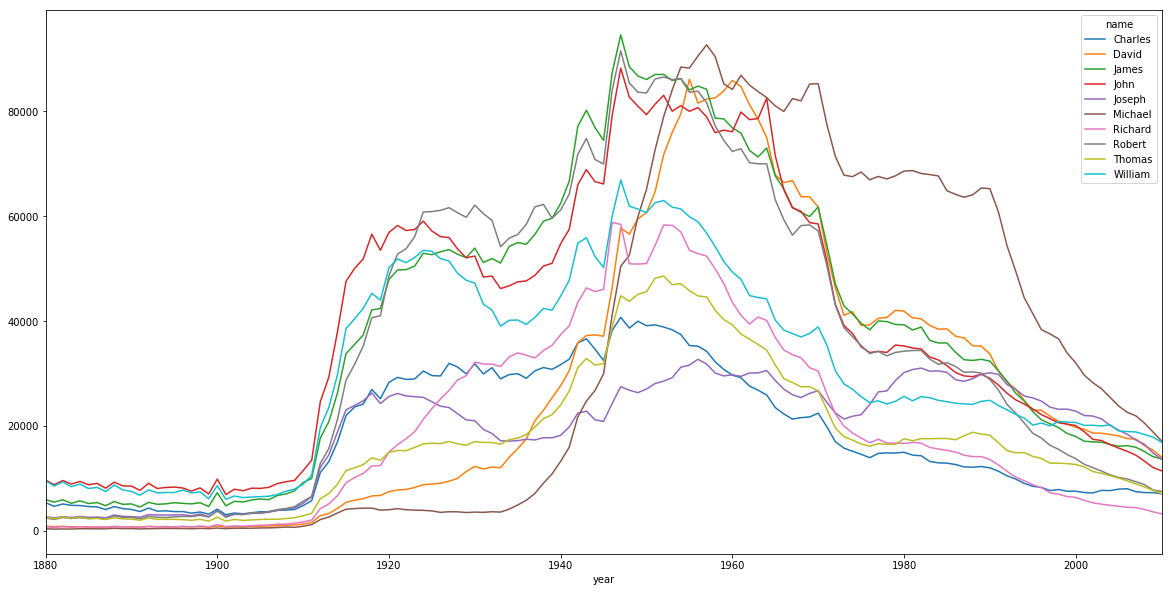

In [327]:
%pylab inline
top10_male_stat.plot(kind = 'line', figsize=[20,10])

In [338]:
male = yobdf[(yobdf['year'] == 2010) & (yobdf['gender'] == 'M')].sort_values('frequency', ascending = False)['name'][0:10].values

In [339]:
top10_male = yobdf[(yobdf['name'].isin(male)) & (yobdf['gender'] == 'M')][['name', 'year', 'frequency']]

In [340]:
top10_male_stat = pandas.pivot_table(top10_male, columns='name', index='year', values='frequency')

Populating the interactive namespace from numpy and matplotlib


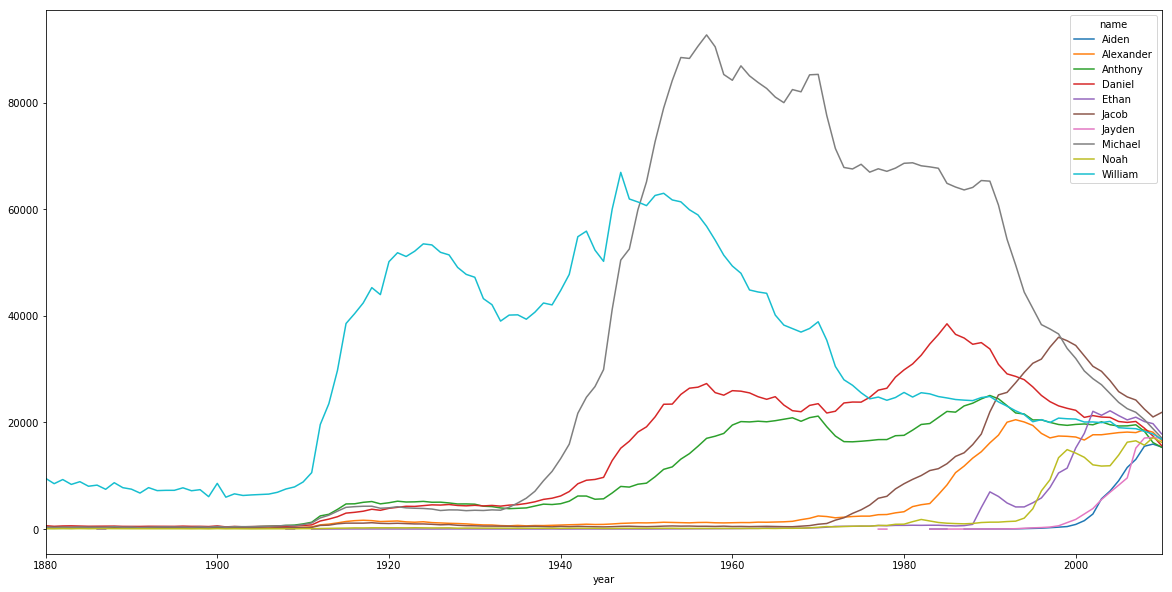

In [341]:
%pylab inline
top10_male_stat.plot(kind = 'line', figsize=[20,10])

In [342]:
female = yobdf[(yobdf['year'] == 2010) & (yobdf['gender'] == 'F')].sort_values('frequency', ascending = False)['name'][0:10].values

In [343]:
top10_female = yobdf[(yobdf['name'].isin(female)) & (yobdf['gender'] == 'F')][['name', 'year', 'frequency']]

In [346]:
top10_female_stat = pandas.pivot_table(top10_female, columns='name', index='year', values='frequency')

Populating the interactive namespace from numpy and matplotlib


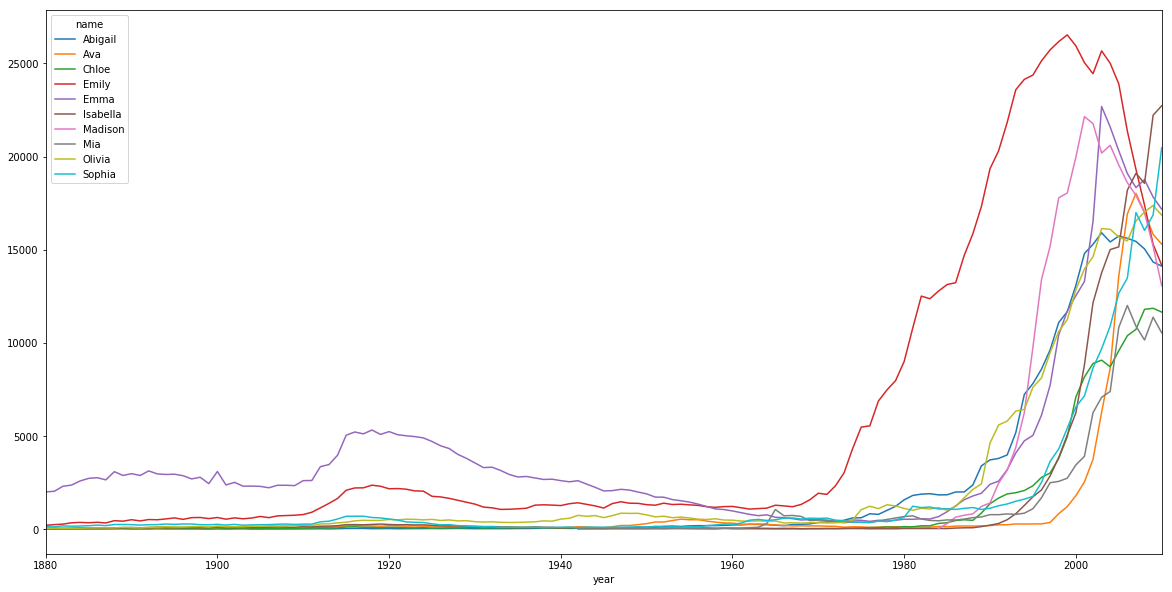

In [347]:
%pylab inline
top10_female_stat.plot(kind = 'line', figsize=[20,10])

## 數據轉換

In [453]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample.csv', index_col=0)

In [454]:
df.head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328


In [455]:
(df['building_area'] / 0.3025).head()

0    19.834711
1    33.057851
2    26.446281
3    26.446281
4    23.140496
Name: building_area, dtype: float64

In [456]:
import numpy as np
np.sqrt(df['building_area']).head()

0    2.449490
1    3.162278
2    2.828427
3    2.828427
4    2.645751
Name: building_area, dtype: float64

In [457]:
(df['address'] + '-' + df['price']).head()

0       高雄市湖內區民生街-4,500元/月
1       新北市蘆洲區長安街-7,500元/月
2    新北市永和區中山路一段-11,000元/月
3       屏東縣潮州鎮六合路-5,000元/月
4       桃園市觀音區四維路-5,000元/月
dtype: object

In [458]:
df['square_feet'] = df['building_area'] / 0.3025
df.head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,square_feet
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810,19.834711
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868,33.057851
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328,26.446281


In [459]:
p = '4,500元/月'
int(p.replace('元/月', '').replace(',', ''))

4500

In [460]:
def normalizePrice(ele):
    res=int(ele.replace('元/月','').replace(',',''))
    return res

normalizePrice(p)

4500

In [490]:
df['price'].map(normalizePrice).head()
df['price'] = df['price'].map(normalizePrice)

In [462]:
def square(ele):
    return ele * ele

square(2)

4

In [463]:
square = lambda ele : ele * ele
square(3)

9

In [464]:
df['price'].map(lambda e : int(e.replace('元/月','').replace(',','')) ).head()

0     4500
1     7500
2    11000
3     5000
4     5000
Name: price, dtype: int64

In [465]:
df=pandas.DataFrame(\
                    [\
                     [60,70,50],\
                     [80,79,68],\
                     [63,66,82]],\
                    columns=['First','Second','Third'])
df

,First,Second,Third
0,60,70,50
1,80,79,68
2,63,66,82


In [466]:
df.apply(lambda e:e.max()-e.min(),axis=1)

0    20
1    12
2    19
dtype: int64

In [467]:
df.apply(lambda e:e.max()-e.min(),axis=0)

First     20
Second    13
Third     32
dtype: int64

In [468]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample.csv', index_col=0)
df.applymap(lambda e : '-' if pandas.isnull(e )else e).head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",-,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",-,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",-,8.0,電梯大樓/分租套房,25.010293,121.511328
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",-,8.0,透天厝/獨立套房,22.551346,120.538032
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",-,7.0,透天厝/分租套房,25.043652,121.141518


In [469]:
df['floor'] = df['floor_info'].map(lambda e: str(e).split('/')[0])

In [470]:
df['total_floor'] = df['floor_info'].map(lambda e: str(e).split('/')[1] if len(str(e).split('/')) >= 2 else e)

In [471]:
df.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,floor,total_floor
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810,3F,3F
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868,4F,5F
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328,8F,12F
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032,3F,3F
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518,4F,5F


## 時間格式轉換

In [472]:
from datetime import datetime
current_time = datetime.now()

In [473]:
type(current_time)

datetime.datetime

In [474]:
current_time.strftime('%Y-%m-%d')

'2017-11-04'

In [475]:
shopping = datetime.strptime('2017-11-11', '%Y-%m-%d')

In [476]:
diff = shopping - current_time

In [477]:
from datetime import datetime, timedelta
current_time - timedelta(days  = 1)

datetime.datetime(2017, 11, 3, 16, 1, 45, 366761)

In [478]:
for i in range(1,10):
    dt = (current_time - timedelta(days = i )).strftime('%Y-%m-%d')
    print(dt)

2017-11-03
2017-11-02
2017-11-01
2017-10-31
2017-10-30
2017-10-29
2017-10-28
2017-10-27
2017-10-26


In [479]:
from time import mktime
mktime(current_time.timetuple())

1509782505.0

In [480]:
start_day = datetime.strptime('1970-1-2', '%Y-%m-%d')
mktime(start_day.timetuple())
#start_day.timetuple()

57600.0

In [481]:
datetime.fromtimestamp(1492859823)

datetime.datetime(2017, 4, 22, 19, 17, 3)

In [482]:
df['search_date'] = pandas.to_datetime(df['search_date'], format = '%Y-%m-%d')

In [483]:
df[['search_date', 'address']].head().to_csv('test_591.csv', encoding= 'utf-8')

In [484]:
import pandas
df2 = pandas.read_csv('test_591.csv', encoding='utf-8', index_col=0, \
                       parse_dates=['search_date'])

In [485]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 2 columns):
search_date    5 non-null datetime64[ns]
address        5 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 120.0+ bytes


## 虛擬變量(DUMMY VARIABLE)

In [486]:
df2=pandas.concat([df,pandas.get_dummies(df['building_use'])],axis=1)

In [487]:
df2 = df.drop('building_use',axis=1)

In [489]:
df.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,floor,total_floor
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810,3F,3F
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868,4F,5F
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328,8F,12F
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032,3F,3F
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518,4F,5F


In [493]:
df2 = pandas.pivot_table(df, index='search_date', columns='building_use', values= 'price', aggfunc='mean')

In [496]:
#df2.T

In [497]:
df3 = pandas.pivot_table(df, index='building_use', columns='search_date', values= 'price', aggfunc='mean')

In [500]:
df['btype']=df['building_use'].map(lambda e:str(e).split('/')[0])
df['buse']=df['building_use'].map(lambda e:str(e).split('/')[1] if len(str(e).split('/'))>1 else None)

In [502]:
df_multi_idx=df.pivot_table(index=['btype','buse'],columns='search_date',values='price',aggfunc=sum)

In [505]:
df_wide=df_multi_idx.unstack()
df_wide.head()

search_date 2017-05-08                                                        \
buse                住辦        其他       分租套房         店面       整層住家       獨立套房   
btype                                                                          
倉庫                 NaN   72325.0        NaN        NaN        NaN        NaN   
公寓            371500.0   58500.0  1224399.0  4490600.0  4241986.0  2321837.0   
其他                 NaN    6000.0        NaN        NaN        NaN        NaN   
別墅             60000.0   27000.0    35800.0    70000.0  1743000.0   149348.0   
廠房                 NaN  116000.0        NaN        NaN        NaN        NaN   

search_date                      2017-05-09             ...    2017-05-14  \
buse                辦公        雅房         住辦        其他   ...            辦公   
btype                                                   ...                 
倉庫                 NaN       NaN        NaN  236744.0   ...           NaN   
公寓           1173780.0  401067.0   159000.0   42999.0   ...     1332610.0   
其他                 NaN       NaN        NaN       NaN   ...           NaN   
別墅                 NaN    4000.0        NaN  114800.0   ...           NaN   
廠房                 NaN       NaN        NaN   45000.0   ...           NaN   

search_date            2017-05-15                                             \
buse                雅房         住辦  其他     分租套房         店面      整層住家     獨立套房   
btype                                                                          
倉庫                 NaN        NaN NaN      NaN        NaN       NaN      NaN   
公寓           2324022.0   421500.0 NaN  14800.0  4686200.0  194800.0  65800.0   
其他                 NaN        NaN NaN      NaN        NaN       NaN      NaN   
別墅             68480.0   139800.0 NaN   7500.0   155000.0  351000.0   9900.0   
廠房                 NaN        NaN NaN      NaN        NaN       NaN      NaN   

search_date                     
buse               辦公       雅房  
btype                           
倉庫                NaN      NaN  
公寓           980994.0  10400.0  
其他                NaN      NaN  
別墅                NaN      NaN  
廠房                NaN      NaN  

[5 rows x 64 columns]

In [506]:
df_long=df_wide.stack()
df_long.head()

search_date  2017-05-08  2017-05-09  2017-05-10  2017-05-11  2017-05-12  \
btype buse                                                                
倉庫    其他        72325.0    236744.0     63748.0    108200.0     60800.0   
公寓    住辦       371500.0    159000.0    494800.0    242600.0   1096300.0   
      其他        58500.0     42999.0         NaN     11000.0     75000.0   
      分租套房    1224399.0   1579138.0   2035480.0   1643348.0   4318694.0   
      店面      4490600.0   3362400.0   7132600.0   4824099.0  10924080.0   

search_date  2017-05-13  2017-05-14  2017-05-15  
btype buse                                       
倉庫    其他       231348.0    590250.0         NaN  
公寓    住辦      1600499.0   1487800.0    421500.0  
      其他       234300.0    143000.0         NaN  
      分租套房    6571657.0   5744947.0     14800.0  
      店面     24972598.0  20999686.0   4686200.0

## 正規運算式

In [507]:
q = '我的電話是0912345678 請打給我, 謝謝'
'0912345678' in q

True

In [514]:
import re
s = 'r'

print(re.match('r',s))
print(re.match('o',s))

# [], match any character within []
print(re.match('[abcdefghijklmnopqrstuvwxyz]', s))

# -: continuous e.g.  [abcdefghijklmnopqrstuvwxyz] => [a-z]
print(re.match('[a-z]', s))


s  = 'R'
print(re.match('[a-z]', s))
print(re.match('[a-zA-Z]', s))

<_sre.SRE_Match object; span=(0, 1), match='r'>
None
<_sre.SRE_Match object; span=(0, 1), match='r'>
<_sre.SRE_Match object; span=(0, 1), match='r'>
None
<_sre.SRE_Match object; span=(0, 1), match='R'>


In [530]:
n = '3'
print(re.match('[0123456789]', n))

# [0123456789] => [0-9]
print(re.match('[0-9]', n))

n = 'Q'
print(re.match('[a-zA-Z0-9]', n))

# [a-zA-Z0-9] => \w
print(re.match('\w', n))


# [0-9] => \d
print(re.match('\d', n))


<_sre.SRE_Match object; span=(0, 1), match='3'>
<_sre.SRE_Match object; span=(0, 1), match='3'>
<_sre.SRE_Match object; span=(0, 1), match='Q'>
<_sre.SRE_Match object; span=(0, 1), match='Q'>
None


In [528]:
s = 'Iphone'

print(re.match('\w', s))

# {n} match number of occurence within {} 
print(re.match('\w{6}', s))

# {m,n} match at least m occurence, match at most n occurence
print(re.match('\w{6,8}', s))


# {1,} match at least 1 occurence
print(re.match('\w{1,}', s))


# {1,} => +
print(re.match('\w+', s))


# {0,} match at least 0 occurence
print(re.match('\w{0,}', s))


# {0,} => *
print(re.match('\w*', s))

<_sre.SRE_Match object; span=(0, 1), match='I'>
<_sre.SRE_Match object; span=(0, 6), match='Iphone'>
<_sre.SRE_Match object; span=(0, 6), match='Iphone'>
<_sre.SRE_Match object; span=(0, 6), match='Iphone'>
<_sre.SRE_Match object; span=(0, 6), match='Iphone'>
<_sre.SRE_Match object; span=(0, 6), match='Iphone'>
<_sre.SRE_Match object; span=(0, 6), match='Iphone'>


In [538]:
import re
phones = ['0912345678','0912-345678', '0912-345-678', '11122233344','09123456783482482984923884968506']
for phone in phones:
    #print(re.match('\d{10}',phone))
    #print(re.match('09\d{8}',phone))
    #print(re.match('09\d{2}-{0,1}\d{3}-{0,1}\d{3}',phone))
    
    # ? => {0,1}
    #print(re.match('09\d{2}-?\d{3}-?\d{3}',phone))
    
    # ^ limit start character, $ limit end character
    print(re.match('^09\d{2}-?\d{3}-?\d{3}$',phone))

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 11), match='0912-345678'>
<_sre.SRE_Match object; span=(0, 12), match='0912-345-678'>
None
None


In [539]:
smile = '^_^'
re.match('.+', smile)

<_sre.SRE_Match object; span=(0, 3), match='^_^'>

In [549]:
import re
print(re.match('\w+@\w+', 'david@largtidata.com'))

# () => groups
m = re.match('(\w+)@(\w+)', 'david@largtidata.com')
print(m.groups())
print(m.groups()[0])
print(m.groups()[1])
username,company =  m.groups()
print(username, company)

m = re.match('(\w+)@([\w.]+)', 'david@largtidata.com')
print(m.groups())



m = re.match('(\w+)@(.+)', 'david@largtidata.com')
print(m.groups())

<_sre.SRE_Match object; span=(0, 16), match='david@largtidata'>
('david', 'largtidata')
david
largtidata
david largtidata
('david', 'largtidata.com')
('david', 'largtidata.com')


In [552]:

m = re.match('(\w+)@([\w.]+)', 'david@largtidata.com;this is an invalid mail')
print(m.groups())

m = re.match('(\w+)@(.+)', 'david@largtidata.com;this is an invalid mail')
print(m.groups())

('david', 'largtidata.com')
('david', 'largtidata.com;this is an invalid mail')


In [556]:
m = re.match('(\d+).(\d+)', '1999.5')
print(m.groups())

m = re.match('(\d+).(\d+)', '1999$5')
print(m.groups())



m = re.match('(\d+)\.(\d+)', '1999.5')
print(m.groups())


m = re.match('(\d+)\.(\d+)', '1999$5')
print(m.groups())

('1999', '5')
('1999', '5')
('1999', '5')


AttributeError: 'NoneType' object has no attribute 'groups'

In [557]:
print('123\n456')

123
456


In [558]:
print(r'123\n456')

123\n456


In [560]:
m=re.match(r"(\w+) (\w+)","David Chiu")
print(m.groups())

m=re.match(r"(?P<first_name>\w+) (?P<last_name>\w+)","David Chiu")
print(m.group('first_name'),m.group('last_name'))

('David', 'Chiu')
David Chiu


In [561]:
str1='scp file.txt root@10.0.0.1:./'
m=re.search('^scp ([\w\.]+) (\w+)@([\w\.]+):(.+)',str1)
if m:
    print(m.group(1),m.group(2),m.group(3),m.group(4))

file.txt root 10.0.0.1 ./


In [563]:
a = '123'
a = None
if a:
    print('exist')

In [567]:
df2 = df[df['layout'].notnull()]

In [570]:
df2[['bedroom','living_room','bathroom','balcony']] = df2['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛(\d+)陽臺')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [572]:
df2[['layout','bedroom','living_room','bathroom','balcony']].head()

,layout,bedroom,living_room,bathroom,balcony
5,2房1廳1衛1陽臺,2,1,1,1
9,2房1廳2衛2陽臺,2,1,2,2
13,2房2廳1衛1陽臺,2,2,1,1
15,4房3廳3衛3陽臺,4,3,3,3
16,1房1廳1衛0陽臺,1,1,1,0


In [603]:
#test = df2['address'].str.extract('(.+?[市縣])(.+?[區市鄉鎮])(.+?[路街巷道里村]).*?')
test = df2['address'].str.extract('(.+?[市縣])(.+?[區市鄉鎮])(.+)')
#df2['address']
#df2['address'][test[0].isnull()]
test.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


,0,1,2
5,新北市,淡水區,民族路
9,基隆市,安樂區,樂利三街
13,嘉義市,西區,興業西路
15,台北市,北投區,新民路
16,新北市,淡水區,中正東路一段
